In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from IPython.display import display
import mglearn

print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'NumPy version: {np.__version__}')
print(f'SciPy version: {sp.__version__}')
print(f'IPython version: {IPython.__version__}')
print(f'scikit-learn version: {sklearn.__version__}')

/Users/matthewmckenna/miniconda3/envs/intro-to-ml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Python version: 3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.23.4
matplotlib version: 2.2.3
NumPy version: 1.15.1
SciPy version: 1.1.0
IPython version: 6.4.0
scikit-learn version: 0.19.1


# Linear Models

For regression, general prediction formula for linear model looks like:

$$ \hat{y} = w[0]*x[0] + w[1]*x[1] + \cdots + w[p]*x[p] + b$$

$x[0]$ to $x[p]$ denote features of a single data point, $w$ and $b$ are the parameters of the model that are learned, and $\hat{y}$ is the prediction the model makes.

For a dataset with a single feature, this is:

$$ \hat{y} = w[0] * x[0] + b $$

$w[0]$ is the slope, and $b$ is the y-axis offset. With more features, $w$ contains the slopes along each feature axis.

The predicted response is the weighted sum of the input features, with weights given by $w$.

w[0]: 0.393906  b: -0.031804


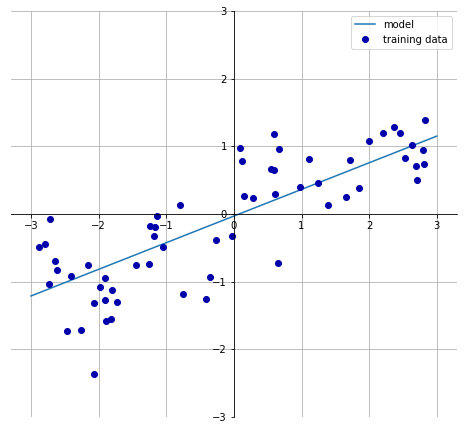

In [2]:
mglearn.plots.plot_linear_regression_wave()

It is a strong assumption that the target $y$ is a linear combination of features. However, for datasets with many features, linear models can be very powerful.

If you have more features than training points, any target $y$ can be perfectly modeled as a linear function.

## Linear regression (aka ordinary least squares)

This method finds the parameters that minimise the *mean squared error* between the predictions and the true regression targets, $y$.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The slope parameters $w$ are stored in `.coef_` and the intercept $b$ is stored in `.intercept_`

In [4]:
print(f'lr.coef_: {lr.coef_}')
print(f'lr.intercept_: {lr.intercept_}')

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [5]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Training set score: 0.67
Test set score: 0.66


Scores for the training and test sets are similar, which means we are likely underfitting.

Let's take another look at the Boston housing dataset (extended)

### Boston

In [6]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print(f'Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Training set score: 0.95
Test set score: 0.61


Discrepancy above is a clear sign of overfitting. We should control for complexity using another form of regression: Ridge Regression

## Ridge Regression

With Ridge, $w$ is chosen to predict the training data well, but also to be as small as possible.

All entries of $w$ should be close to zero. This is a form of *regularisation*.

Ridge regression uses L2 regularisation, which penalises the L2 norm of the coefficients, or the Euclidean length of $w$.

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge.score(X_test, y_test):.2f}')

Training set score: 0.89
Test set score: 0.75


We see we already have better generalisation, but a slightly worse training set score.

Ridge makes a trade-off between the simplicity of the model (near-zero coefficients) and performance on the training set.

The parameter `alpha` is used to control this. This parameter defaults to `alpha=1.0`.

Increasing alpha forces coefficients to move towards zero, which decreases training set performance, but might help generalisation.

In [8]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'Training set score: {ridge10.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge10.score(X_test, y_test):.2f}')

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted.

For very small values of alpha, coefficients are barely restricted at all, and we end up with a model very close to `LinearRegression`:

In [9]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'Training set score: {ridge01.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge01.score(X_test, y_test):.2f}')

Training set score: 0.93
Test set score: 0.77


`alpha=0.1` seems to be working well.

We can also look at the `.coef_` attribute of the model with various values of alpha.

Higher alpha means a more restrictive model, so we expect the entries of `coef_` to have smaller magnitude for high values of alpha.

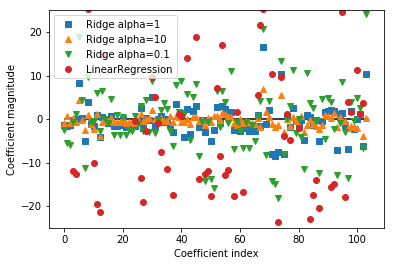

In [10]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

We can also fix the value of `alpha`, but vary the amount of training data available.

Below we subsample the Boston Housing dataset, and evaluated `LinearRegression` and `Ridge(alpha=1)` on subsets of increasing size.

This is known as a learning curve.

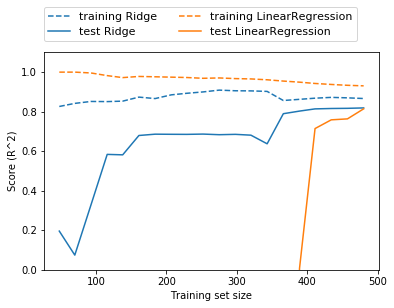

In [11]:
mglearn.plots.plot_ridge_n_samples()

Training score is higher than the test score for both Ridge and LinearRegression. Because Ridge is regularised, the training score of ridge is lower than that of linear regression.

The test score for ridge is better, especially for smaller subsets of the data. With less than 400 data points, LinearRegression is not able to learn anything.

The main takeaway from this is: with enough training data regularisation becomes less important.

## Lasso

Alternative to Ridge is Lasso. Lasso also restricts coefficients to be close to zero, but in a slightly different way, using L1 regularisation.

Lasso penalises the L1 norm of the coefficient vector -- in other words, the sum of the absolute values of the coefficients.

The consequence of L1 regularisation is that some coefficients are *exactly* zero. Some features are ignored entirely by the model.

This is almost a form of automatic feature selection, and can make the model easier to interpret.

Let's look at this on the extended Boston housing dataset.

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'Training set score: {lasso.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso.coef_ != 0)}')

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso does badly on the training and test sets. We're likely underfitting, and we're only using 4/105 features.

We can adjust the regularisation parameter alpha (default=1.0).

We can reduce underfitting by decreasing alpha. We will also need to increase `max_iter`

In [13]:
# increase `max_iter` otherwise the model will tell us to do this
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso001.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso001.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso001.coef_ != 0)}')

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than Ridge, and we're only using 33/105 features, making the model easier to understand.

However, if we set `alpha` too low, we remove the effect of regularisation and end up overfitting, like LinearRegression.

In [14]:
# increase `max_iter` otherwise the model will tell us to do this
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso00001.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso00001.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso00001.coef_ != 0)}')

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


We can plot the coefficients of different models:

Text(0,0.5,'Coefficient magnitude')

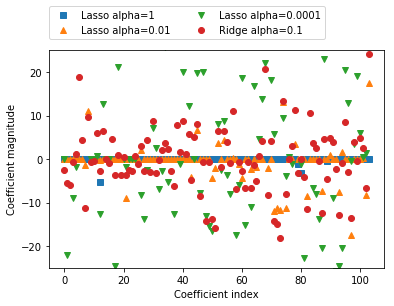

In [15]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

With `alpha=1` we see that most of the coefficients are zero (already knew this), but the remaining coefficients are also small in magnitude.

With `alpha=0.01` (orange triangle) we get similar performance to Ridge with `alpha=0.1` (red circle), but with Ridge, all coefficients are nonzero.

In practice, Ridge is usually the first choice. However, if you have a large amount of features, and expect only a few of them to be important, then Lasso may be a better choice.

Lasso will also provide a model that's easier to interpret.

scikit-learn also provides an `ElasticNet` class, which works best in practice, and which combines the penalties of Ridge and Lasso, though you now have two parameters to adjust.

## Linear models for classification

Linear models are also used extensively for classification. For binary classification, predictions are made using the following formula:

$$ \hat{y} = w[0]*x[0] + w[1]*x[1] + \cdots + w[p]*x[p] + b > 0 $$

Instead of returning the weighted sum of the features we threshold the predicted value at zero. If the function is smaller than 0 we predict the class -1, otherwise +1.

For linear models for regression, the output $\hat{y}$ is a linear function of the features, a line, plane, or hyperplane.

For linear models for classification, the *decision boundary* is a linear function of the input.

The two most common linear classification algorithms are *logistic regression* and *linear support vector machines*.

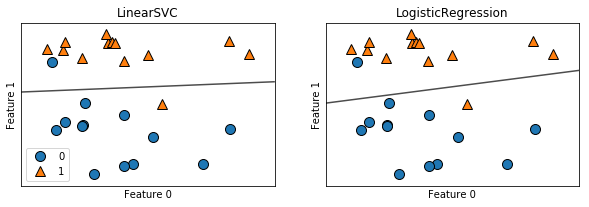

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf,
        X,
        fill=False,
        eps=0.5,
        ax=ax,
        alpha=0.7,
    )
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

The first feature of the `forge` dataset is on the x-axis, and the second feature on the y-axis. The decision boundaries are drawn as straight lines.

By default both models apply L2 regularisation.

For both models the parameter which determines the strength of the regularisation is `C`. Higher values of `C` correspond to *less* regularisation. With a high value of `C`, LogisticRegression and LinearSVC try to fit the training set as best as possible.

With lower values of `C` the model puts more emphasis on trying to find a coefficient vector $w$ that is close to zero.

Using low values of `C` will cause the algorithms to try to adjust the "majority" of data points, while using higher values of `C` stresses the importance that each individual data piont be classified correctly.

An illustration using LinearSVC is shown below:

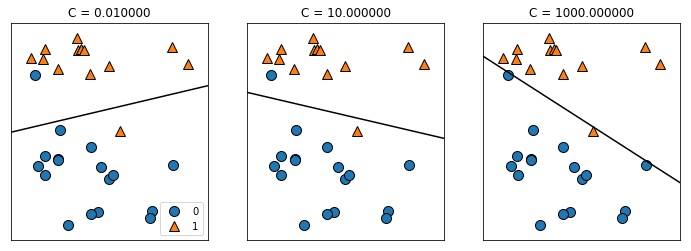

In [17]:
mglearn.plots.plot_linear_svc_regularization()

On the LHS we have a small `C` which corresponds to a lot of regularisation. The strongly regularised model chooses a relatively horizontal line.

In the middle, `C` is slightly higher, and the model focuses more on the two misclassified samples.

On the RHS, the very high value of `C` means almost no regularisation, and we see that the model tries hard to classify all points correctly, but that it may not be capturing the overall layout of the class. This model is likely overfitting.

In higher dimensions, linear models for classification become very powerful, and guarding against overfitting become increasingly important.

We'll now look at LogisticRegression in more detail with the breast cancer dataset:

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42,
)
logreg = LogisticRegression().fit(X_train, y_train)

print(f'Training set score: {logreg.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg.score(X_test, y_test):.3f}')

Training set score: 0.953
Test set score: 0.958


The default `C=1` provides quite good performance, with 95% accuracy on both the training and test sets. However, as both scores are close, it is likely that we're underfitting. We will increase C to get a more flexible model.

In [19]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f'Training set score: {logreg100.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg100.score(X_test, y_test):.3f}')

Training set score: 0.972
Test set score: 0.965


In [20]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f'Training set score: {logreg001.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg001.score(X_test, y_test):.3f}')

Training set score: 0.934
Test set score: 0.930


Using `C=100` gives higher training and test set accuracy, confirming that a more complex model will perform better.

With `C=0.01` we see that a more regularised (less complex) model performs worse.

We can take a look at the coefficients learned by the model:

In [21]:
logreg.coef_

array([[ 1.87636896e+00,  9.74009030e-02, -5.46510196e-02,
         2.83969442e-05, -1.46297381e-01, -3.77326514e-01,
        -5.71065914e-01, -2.94444300e-01, -2.38667077e-01,
        -3.43994034e-02, -6.68925196e-03,  1.23376818e+00,
         5.97614539e-02, -9.32310807e-02, -1.44644584e-02,
        -8.12079781e-03, -4.14865025e-02, -3.41061444e-02,
        -4.07784297e-02,  3.91652300e-03,  1.13867599e+00,
        -3.15205857e-01, -9.49949461e-02, -2.56291959e-02,
        -2.60235920e-01, -1.20961758e+00, -1.56229354e+00,
        -6.01888578e-01, -7.16770062e-01, -1.28004320e-01]])

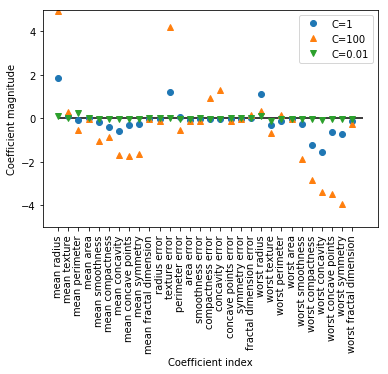

In [22]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

If we desire a more interpretable model, using L1 regularisation may help, as it limits the model to only using a few features.

Training accuracy of l1 logreg with C=0.001 0.91
Test accuracy of l1 logreg with C=0.001 0.92
Training accuracy of l1 logreg with C=1.000 0.96
Test accuracy of l1 logreg with C=1.000 0.96
Training accuracy of l1 logreg with C=100.000 0.99
Test accuracy of l1 logreg with C=100.000 0.98


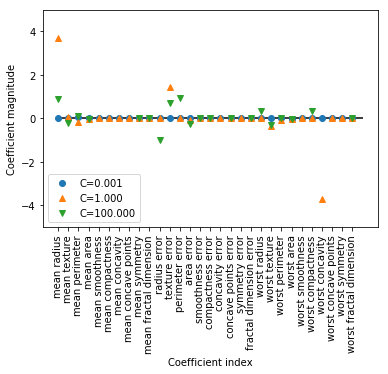

In [23]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print(f'Training accuracy of l1 logreg with C={C:.3f} {lr_l1.score(X_train, y_train):.2f}')
    print(f'Test accuracy of l1 logreg with C={C:.3f} {lr_l1.score(X_test, y_test):.2f}')
    plt.plot(lr_l1.coef_.T, marker, label=f'C={C:.3f}')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification

Many linear classification models are for binary classification only, and don't extend naturally to the multiclass case (with the exception of logistic regression).

A common technique to extend a binary classification algorithm is the *one-vs.-rest* approach.

In this approach, a binary model is learned for each class that tries to separate that class from all other classes, resulting in as many binary models as there are classes. The classifier with the highest score on its single class "wins", and this class label is returned as the prediction.

Having one binary classifer per class results in having one vector of coefficients (`w`) and one intercept (`b`) for each class.

$$ w[0]*x[0] + w[1]*x[1] + \cdots + w[p]*x[p] + b $$

The mathematics behind multiclass logistic regression differ somewhat from the one-vs.-all approach, but also result in one confidence vector and intercept per class.

Let's apply the one-vs.-rest method to a simple three-class classification dataset

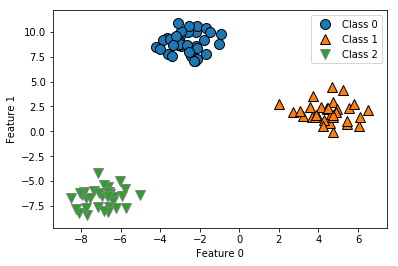

In [24]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

Now we train a `LinearSVC` on the dataset

In [25]:
linear_svm = LinearSVC().fit(X, y)
print(f'Coefficient shape: {linear_svm.coef_.shape}')
print(f'Intercept shape: {linear_svm.intercept_.shape}')

Coefficient shape: (3, 2)
Intercept shape: (3,)


We see that the shape of `coef_` is (3, 2), meaning that each row of `coef_` contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature.

The `intercept_` is now a one-dimensional array storing the intercepts for each class.

Let's visualise the lines given by the three binary classifiers.

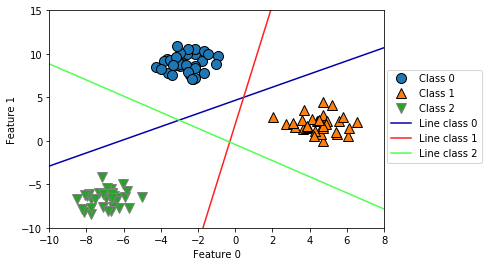

In [26]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, colour in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    # TODO: work through the formula below
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=colour)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(
    [
        'Class 0',
        'Class 1',
        'Class 2',
        'Line class 0',
        'Line class 1',
        'Line class 2',
    ],
    loc=(1.01, 0.3),
)

We can see that all points belonging to class 0 are above the line corresponding to class 0.

What about the triangle in the middle of the plot though? The answer is the one with the highest value for the classification formula: the class of closest line.

The following shows the predictions for all regions of the 2D space:

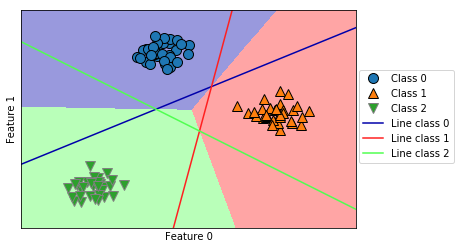

In [27]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
for coef, intercept, colour in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=colour)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(
    [
        'Class 0',
        'Class 1',
        'Class 2',
        'Line class 0',
        'Line class 1',
        'Line class 2',
    ],
    loc=(1.01, 0.3),
)

### Strengths, Weaknesses, and Parameters

Parameters:

* regularisation parameter (`alpha` in regression models, and `C` in classification models)
* large values for `alpha`, or small values for `C` mean simple models
* important to tune these parameters, especially in regression
* usually searched for on a logarithmic scale
* another choice is L1 or L2 regularisation
  * if you assume only a few features are important you should use L1
  * otherwise default to L2
  * L1 can help with interpretability

Strengths:

* linear models are very fast to train, and fast to predict
* scale to large datasets, and work well with sparse data
* if data has 100,000s+ of records then investigate `solver='sag'` option in `LogisticRegression` and `Ridge`.
  * other options are the `SGDClassifier` and `SGDRegressor` class, which implement even more scalable versions of linear models
* relatively easy to understand how a prediction is made
* perform well when number of features is large compared to number of samples

Weaknesses:

* coefficients can be hard to interpret if your dataset has highly correlated features
